In [1]:
from CeyerLibrary import loadAuger, generateDict, index_of
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

monthDict = generateDict()  #Set up the dictionary

In [2]:
# Input file name and location
mainpath = '/Users/qingliu/Dropbox (MIT)/littlemachine/'
filename = 'sep05_17.a02'

In [3]:
# Load Data
filepath = mainpath + '20' + filename[6:8] + '/' + monthDict[filename[:3]] + '_' + filename[:3] + '/' + filename
f = open(filepath, 'r')
data = f.readlines()
f.close()

In [4]:
# Process Data
if data[0].split()[0] == 'IGOR':
    print('Data already processed!')
else:
    scan = 65
    i = 0
    file = open(filepath,'w')
    file.write('IGOR\nWaves Voltage' + chr(scan) + ', Auger' + chr(scan) +'\nBegin\n')
    curr_energy = list(map(float, data[i].split()))[0]
    
    while i < len(data) - 1:
        next_energy = list(map(float, data[i + 1].split()))[0]
        if abs(curr_energy - next_energy) > 0.1:
            file.write(data[i])
            if abs(curr_energy - next_energy) > 0.5:
                scan += 1
                file.write('End\n\nWaves Voltage' + chr(scan) + ', Auger' + chr(scan) +'\nBegin\n')
        curr_energy = next_energy
        i += 1
    file.write(data[i] + 'End\n')
    file.close()
    print(filename, 'Success!')

sep05_17.a02 Success!


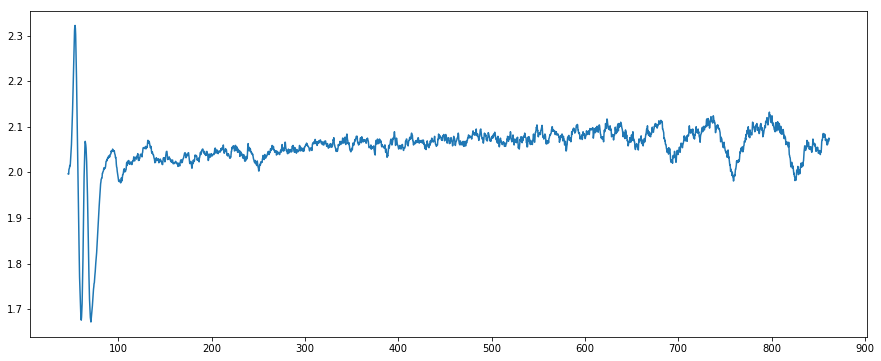

In [5]:
filehandle = open(filepath)
data = loadAuger(filepath)

#%% Normalize data
energy = data[:,1]
counts = data[:,0]
#counts = counts/max(counts)*10000
plt.figure(figsize=(15, 6))
plt.plot(counts,energy)
# plt.xlim([40, 200])

In [6]:
chr(scan)

'A'